### Importing Essential Libraries


In [156]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from scipy.stats import zscore
sns.set(color_codes=True) 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [157]:
#Before reading the CSV file, we have edited the headers from the data dictionary that has been provided to us
heart_df=pd.read_csv("heartdisease.csv")

### Check the top few records and the dimensions of the dataset

In [158]:
heart_df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [159]:
heart_df.shape
#The dataset contains 200 instances and 14 variables

(200, 14)

In [160]:
#Checking the datatypes
heart_df.dtypes

Age          int64
Sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

**Here, we can see a lot of integer values in object type. So, we need to convert them to the int datatype. Also, we can see a lot of missing values in the form of '?'. Let us count those values**

In [161]:
heart_df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**The compiler doesn't know that "?" is a missing value. So we are going to tell the compiler and reload the dataframe**

In [162]:
missing_values = ["?"]
heart_df = pd.read_csv("heartdisease.csv", na_values = missing_values)

In [163]:
heart_df.isnull().sum()

Age           0
Sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

**Now, as we can see that a few attributes have too many missing values. We need to drop those columns completely as they are not going to play a very significant role in our analysis. 
For the attributes like "col" and "fbs", we are not going to drop the columns. We are going to treat the missing values for them.**

In [164]:
heart_df.drop(["trestbps","thalach","exang","oldpeak","slope","ca","thal"], inplace=True, axis=1)

In [165]:
heart_df.dtypes

Age          int64
Sex          int64
cp           int64
chol       float64
fbs        float64
restecg      int64
num          int64
dtype: object

**We do not have any object type left now. Hence, we can proceed
Also, after going through the data dictionary, we found that sex, cp, fbs, restecg and num are categorical variables while Age and cholestrol are numeric variables**

**When the CSV file was opened, there was another peculiarity that was found in the dataset, i.e Cholestrol is having 0 values in it. It is not possible for anyone to have 0 cholestrol. This clearly indicates missing values. Let us count how many 0 values are there in it**

In [166]:
#Finding the total number of 0 values in chol
heart_df["chol"].isin([0]).sum()

49

**49 is a significantly high number when we have only 200 samples. We cannot treat the 1/4th of the missing values in a column. So, we'll have to drop this column as well.**


In [167]:
heart_df.drop(["chol"],inplace=True, axis=1)

### Treating the missing values

**We are now left with only 1 column with missing values, i.e fbs. The number of missing values is only 7. We can either drop the columns or replace the values with mode as we are dealing with categorical data here. Let's go with the latter option and replace the missing values with mode**

In [168]:
#Replacing missing values with mode
heart_df['fbs'] = heart_df['fbs'].fillna(heart_df['fbs'].mode()[0])

In [169]:
heart_df.isnull().sum()

Age        0
Sex        0
cp         0
fbs        0
restecg    0
num        0
dtype: int64

### Univariate and Multivariate Analysis
**Kindly note that we have not included the dropped features as our univariate and multivariate analysis because they might give us deceiving picture of the dataset due to large amount of missing values**

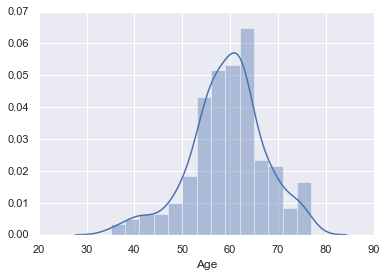

In [170]:
#Age distribution
sns.distplot(heart_df['Age'])

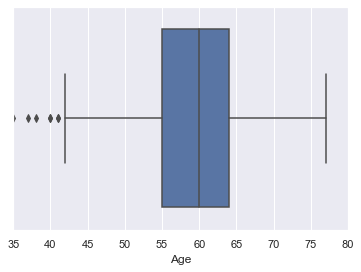

In [171]:
sns.boxplot(heart_df['Age'])

**Here, we can see the presence of outliers, which we are going to treat later**

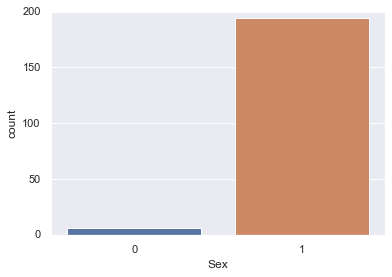

In [172]:
sns.countplot(x ='Sex', data = heart_df)

**The majority of our samples are males and only a few values depict females. The model that we are going to train might not give very accurate results for females.**

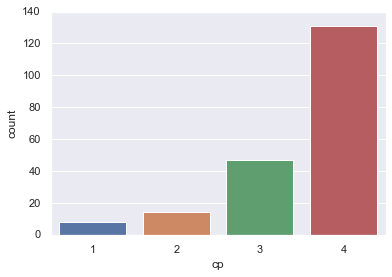

In [173]:
sns.countplot(x ='cp', data = heart_df)

**For majority, chest pain is asymptomatic**

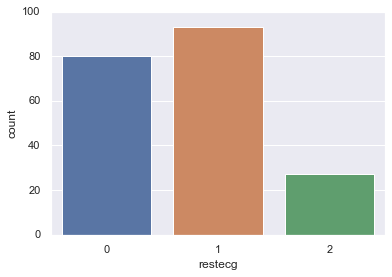

In [174]:
sns.countplot(x ='restecg', data = heart_df)

**Majority is having the value 1**

## Treatment of outliers

In [175]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(heart_df["Age"]))
print(z)

[0.46842053 1.96993293 0.08341736 0.55825461 0.85342371 0.85342371
 0.72508932 0.08341736 0.08341736 0.08341736 0.42992022 0.04491704
 0.34008614 0.46842053 0.30158582 0.34008614 0.46842053 1.71326414
 0.46842053 0.08341736 0.17325143 0.59675493 0.46842053 1.88009885
 0.94325779 1.23842689 1.07159218 0.08341736 0.42992022 0.55825461
 0.686589   2.26510203 0.46842053 0.55825461 0.94325779 0.59675493
 0.08341736 0.08341736 0.17325143 0.04491704 0.21175175 2.4832705
 0.21175175 2.3549361  0.30158582 0.46842053 0.04491704 1.07159218
 0.04491704 2.22660171 0.55825461 0.46842053 0.34008614 0.42992022
 0.81492339 1.1100925  0.81492339 0.08341736 0.34008614 0.04491704
 1.07159218 0.21175175 0.30158582 0.42992022 0.17325143 1.23842689
 0.9817581  0.17325143 0.72508932 0.46842053 0.55825461 0.30158582
 0.72508932 0.686589   1.62343007 2.00843324 1.32826096 1.07159218
 0.08341736 0.59675493 0.17325143 0.21175175 0.9817581  0.34008614
 0.72508932 0.46842053 1.23842689 1.07159218 0.34008614 0.55825

In [176]:
threshold = 3
print(np.where(z > 3))

(array([96], dtype=int64),)


In [177]:
heart_df["z_score"] = z

In [178]:
sub_df = heart_df[heart_df['z_score'] > 3] 

In [179]:
sub_df.head()

,Age,Sex,cp,fbs,restecg,num,z_score
96,35,1,3,0.0,1,0,3.124942


**Here, we can see that only the row 96 is having an outliers when we do it with z scores. We have calculated z score of only Age column as it is the only continous feature that we have and rest are categorical features**

In [180]:
#Dropping the column with outlier
heart_df.drop(axis=0, index=96, inplace=True)

In [181]:
heart_df.drop(["z_score"],axis=1,inplace=True)

### Seperating the input and output variables


In [182]:
df_x = heart_df.drop(columns=["num"])
y = heart_df[["num"]]

### Seperating the categorical variable from numerical

In [183]:
cat_col=df_x.drop(columns=["Age"])
num_col=heart_df[["Age"]]

In [184]:
#For the sake of encoding, we are converting the features in cat_col to string types
cat_col = cat_col.astype(str)

In [185]:
cat_col.dtypes

Sex        object
cp         object
fbs        object
restecg    object
dtype: object

In [186]:
#One Hot Encoding
cat_col = pd.get_dummies(cat_col)

In [187]:
cat_col

,Sex_0,Sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0.0,fbs_1.0,restecg_0,restecg_1,restecg_2
0,0,1,0,0,0,1,1,0,0,1,0
1,0,1,0,0,0,1,1,0,0,1,0
2,0,1,0,0,0,1,1,0,0,1,0
3,0,1,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,1,0,1,0,1,0
196,0,1,1,0,0,0,1,0,0,1,0
197,0,1,0,0,0,1,0,1,0,1,0
198,0,1,0,0,0,1,0,1,0,0,1


In [188]:
x = pd.concat([num_col, cat_col], axis=1)
x.head()

,Age,Sex_0,Sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0.0,fbs_1.0,restecg_0,restecg_1,restecg_2
0,63,0,1,0,0,0,1,1,0,0,1,0
1,44,0,1,0,0,0,1,1,0,0,1,0
2,60,0,1,0,0,0,1,1,0,0,1,0
3,55,0,1,0,0,0,1,1,0,0,1,0
4,66,0,1,0,0,1,0,0,1,0,0,1


## Model Building

In [255]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=9, stratify=y)

In [256]:
print(x_train.shape,x_test.shape)

(139, 12) (60, 12)


In [257]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [258]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.8633093525179856
0.23333333333333334


In [259]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.460431654676259
0.25


0.25


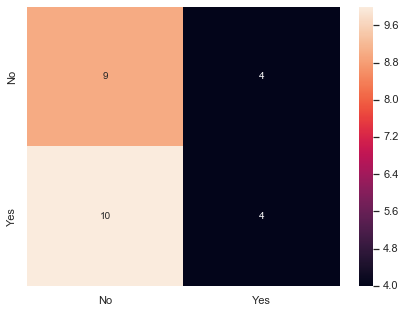

In [260]:
from sklearn import metrics
print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensembling

In [261]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)


0.23333333333333334


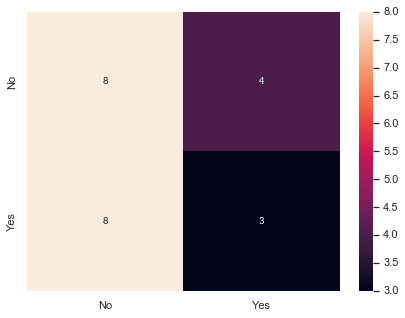

In [262]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### AdaBoost

In [263]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.3


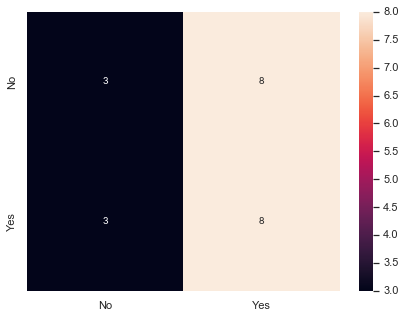

In [264]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


### Gradient Boosting

0.23333333333333334


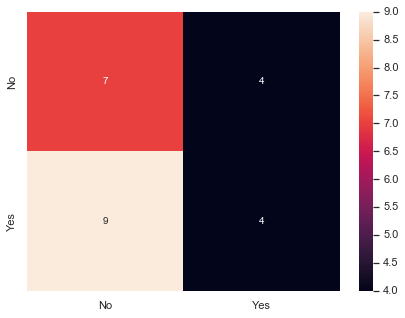

In [269]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Random Forest

In [270]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.23333333333333334


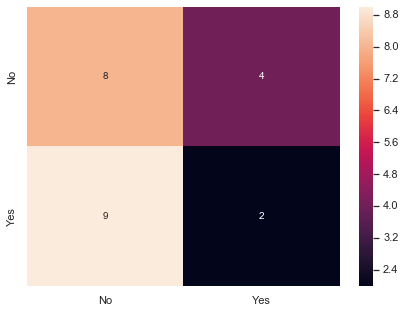

In [271]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**We have a poor model because there were a lot of missing values in the dataset due to which a lot of features had to be dropped**

In [268]:
#Saving our model
from sklearn.externals import joblib
joblib.dump(model,'Heart.csv')

['Heart.csv']